In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from pathlib import Path
%matplotlib inline

<b><big><big>1. Load les données non-structurées (spectres) et structurées en mémoire</b></big></big>

<u>Données non-structurées</u>

In [3]:
main_folder = Path('./datasets/source/20210106_datasetSA302_pour_UdeM').resolve()
spectra_paths = list(main_folder.glob('EX*.txt'))
spectra_paths.sort()
fluos = [pd.read_csv(main_folder / file, sep = "\t", index_col = "sequence") for file in spectra_paths]
fluos_axis = list(fluos[0].columns.map(int).values)

Visualisation pour un échantillon

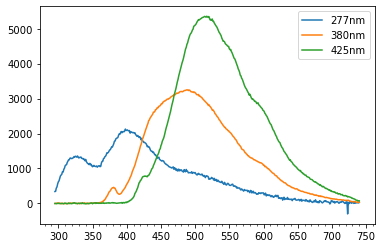

In [4]:
echantillon = 20000 #au hasard
plt.figure(0)

plt.plot(fluos_axis, fluos[0].iloc[echantillon], label = "277nm")
plt.plot(fluos_axis, fluos[1].iloc[echantillon], label = "380nm")
plt.plot(fluos_axis, fluos[2].iloc[echantillon], label = "425nm")
    
ax = plt.gca()
ax.legend()
ax.xaxis.set_major_locator(ticker.MultipleLocator(50))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(10))


<u>Données structurées</u>

In [6]:
y_file = "Y_SA302.txt"
Y_data = pd.read_csv(main_folder / y_file, sep = "\t", index_col = "sequence")

In [7]:
Y_data

,scelle,outil_id,mesure_date,mesure_heure,fluo_l,fluo_qres,sa_verdict,sa_prob_bourgeon,sa_prob_classer,sa_prob_ok,sa_controle,greffon_brix,greffon_transmittance,greffon_defaut_severite,greffon_defaut_type,greffon_limpidite
sequence,,,,,,,,,,,,,,,,
spectraceriii_02-17015,1626-14597,SA3-02,2016-05-10,09:02:24,3.697,6.053,A Classer,0.000,0.999,0.001,0,67.0,62,VR,4,0
spectraceriii_02-17016,1626-14598,SA3-02,2016-05-10,09:03:43,2.806,2.744,A Classer,0.042,0.951,0.007,0,67.2,76,CROCHET,0,0
spectraceriii_02-17017,1626-14655,SA3-02,2016-05-10,10:08:29,1.868,1.618,A Classer,0.000,0.008,0.992,0,67.0,89,OK - Inspecteur,0,0
spectraceriii_02-17018,1626-14656,SA3-02,2016-05-10,10:09:40,1.993,1.730,A Classer,0.000,0.010,0.990,0,66.7,87,OK - Inspecteur,0,0
spectraceriii_02-17019,1626-14657,SA3-02,2016-05-10,10:11:36,1.508,0.685,OK,0.000,0.030,0.970,0,66.7,88,OK - SpectrAcer,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
spectraceriii_02-86382,2075-44030,SA3-02,2020-08-28,15:45:05,0.110,1.080,A Classer,0.005,0.221,0.770,0,66.0,40,OK - Inspecteur,0,0
spectraceriii_02-86383,2075-44031,SA3-02,2020-08-28,15:46:05,0.520,1.470,A Classer,0.072,0.609,0.061,0,65.3,59,OK - Inspecteur,0,0
spectraceriii_02-86384,2075-44032,SA3-02,2020-08-28,15:46:58,0.470,1.340,A Classer,0.010,0.789,0.163,0,66.6,49,OK - Inspecteur,0,0


In [8]:
others = pd.DataFrame(Y_data).drop(columns = ["scelle", "mesure_date", "mesure_heure", "outil_id", "fluo_l", "fluo_qres", "sa_verdict","sa_prob_bourgeon", 
                                              "sa_prob_classer", "sa_prob_ok", "greffon_limpidite", 
                                              "SA_typicite_fluo_residuel", "greffon_limpidite", "sa_controle"], errors = 'ignore')
# og_results = pd.DataFrame(Y_data)[[]]

result = Y_data["greffon_defaut_severite"]
Y = result.replace('OK - Inspecteur',3).replace('OK - SpectrAcer',3).replace('CROCHET',2).replace('VR',1).replace('NC',0).replace('OK',3)
Y_labels = ['NC', 'VR', 'CROCHET', "OK"]

<big><b><u>Choix des données pour la classification:</u></big></b>

<b>mesure_heure</b> a été enlevé puisque non-pertinants.<br />
<b>SA_verdict, SA_prob_bourgeon, SA_prob_classer, SA_prob_ok, SA_typicite_fluo_brasLevier et SA_typicite_fluo_residuel</b> ont été enlevés puisqu'ils proviennent des résultats de l'algorythme original.<br>
<b>greffon_limpidite</b> a été enlevé, car toutes les valeurs sont nulles.<br>
<b>SA_controle</b> est aléatoire par nature, donc on peut l'enlever aussi.

<b><font color="DarkOrange">greffon_defaut_severite</font></b> sera notre vérité de référence pour la préparation de modèle, avec 5 classes: <br />
<b>CT, VR, CROCHET, OK - Automatique et OK - Inspecteur.</b>
Additionellement, il y a quelques échantillons nommés "OK". Ils sont mis dans OK - Inspecteur.
Ce choix initial est simple, mais est contaminé par les résultats de l'ancien algorithme. De plus, on va jouer avec <b><font color="DarkOrange">greffon_defaut_type</font></b> après avoir obtenu des résultats initiaux (sous classe).<br />
Idée: cross-ref les décision automatiques avec les seconds opinons humains.

<u>Répartitions des défauts</u>

In [9]:
# Si tu veux le output file directement sans nettoyer, uncomment ces lignes

result = pd.concat([fluos[0].add_prefix("277_"),fluos[0].add_prefix("380_"),fluos[0].add_prefix("425_"), others])
result.to_pickle("results.pkl")
## Si tu veux un fichier human-readable, uncomment cette ligne
#result.to_csv("results.csv")

<b><big><big>2. Analyse exploratoire et nettoyage préventif</b></big></big>

On peut voir le pic d'émission sur les spectres 380nm et 425nm. Peut-on normaliser sur le maximum de ce pic?

Regardons la distribution des intensités à la longueur d'onde d'émission.


/home/vincent/miniconda3/envs/ml/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/vincent/miniconda3/envs/ml/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/vincent/miniconda3/envs/ml/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/h

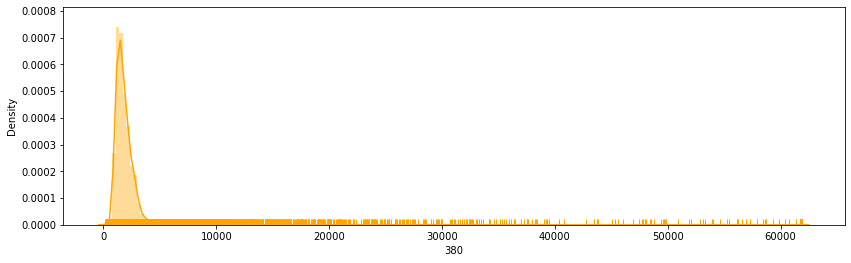

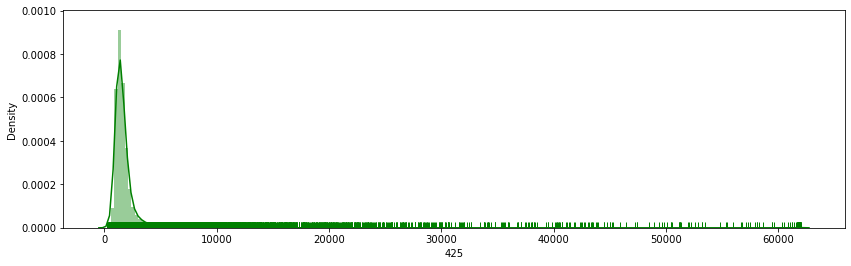

In [11]:
plt.figure(0, figsize=(14, 4))
sns.distplot(fluos[1]["380"], color='orange', rug = True, bins=200, hist_kws={'alpha': 0.4});
plt.figure(1, figsize=(14, 4))
sns.distplot(fluos[2]["425"], color='green', rug = True, bins=200, hist_kws={'alpha': 0.4});

On peut observer qu'il y a plusieurs spectres qui sont plus de 10x la moyenne d'intensité! Est-ce un problème?

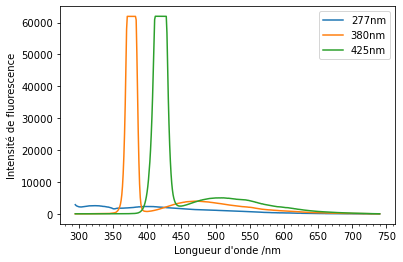

In [12]:
max_row = fluos[1]["380"].idxmax(axis=0)

plt.figure(0)
plt.plot(fluos_axis, fluos[0].loc[max_row], label = "277nm")
plt.plot(fluos_axis, fluos[1].loc[max_row], label = "380nm")
plt.plot(fluos_axis, fluos[2].loc[max_row], label = "425nm")
plt.xlabel("Longueur d'onde /nm")
plt.ylabel("Intensité de fluorescence")
ax = plt.gca()
ax.legend()
ax.xaxis.set_major_locator(ticker.MultipleLocator(50))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(10))

# #plt.title("Fluos")

# plt.figure(1)
# plt.plot(lspr_axis, lspr.loc[max_row])

# ax = plt.gca()
# ax.xaxis.set_major_locator(ticker.MultipleLocator(25))
# ax.xaxis.set_minor_locator(ticker.MultipleLocator(5))
# plt.title("LSPR");

Probablement... Le signal est saturé à l'émission, mais le reste de la bosse de fluo est dans la même gamme d'intensité que la moyenne. Un filtre mal placé?<br>Ce genre d'échantillon na pas réussi à être classifié automatiquement.

Regardons la distribution de l'intégrale des spectres. La distribution devrait être similaire si c'est le seul problème qui fait fluctuer beaucoup le signal. En plus on va pouvoir s'informer sur l'émission à 277nm et la LSPR!

/home/vincent/miniconda3/envs/ml/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/vincent/miniconda3/envs/ml/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/vincent/miniconda3/envs/ml/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/h

Text(0.5, 1.0, 'Fluo 425nm')

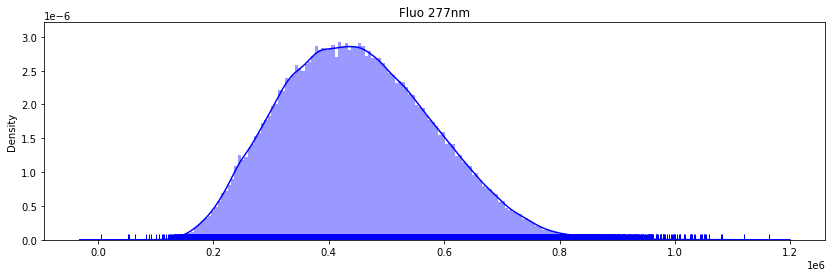

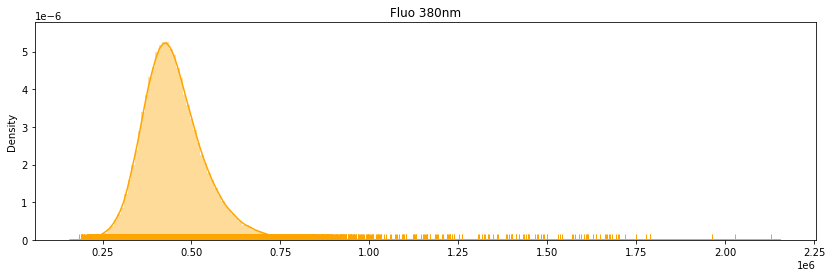

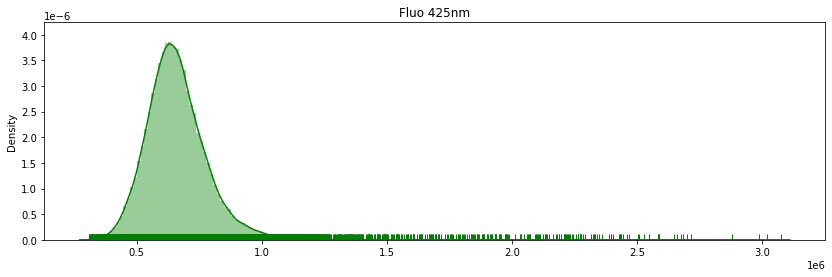

In [13]:
plt.figure(0, figsize=(14, 4))
sns.distplot(fluos[0].sum(axis=1), color='blue', bins=200, rug = True, hist_kws={'alpha': 0.4}, );
plt.title("Fluo 277nm")

plt.figure(1, figsize=(14, 4))
sns.distplot(fluos[1].sum(axis=1), color='orange', bins=200, rug = True, hist_kws={'alpha': 0.4});
plt.title("Fluo 380nm")

plt.figure(2, figsize=(14, 4))
sns.distplot(fluos[2].sum(axis=1), color='green', bins=200, rug = True, hist_kws={'alpha': 0.4});
plt.title("Fluo 425nm")

# plt.figure(3, figsize=(14, 4))
# sns.distplot(lspr.sum(axis=1), color='red', bins=200, rug= True, hist_kws={'alpha': 0.4});
# plt.title("LSPR");

On observe moins de cas extrèmes à la fin de la distribution de fluo 380nm en regardant la distribution des intégrales au lieu de la valeur du pixel à l'émission, probablement parce que le problème a été "dilué" avec tous les points dans l'intégrale. Un indice d'un nouveau problème potentiel: <b>des spectres trop faibles sont possibles</b>, surtout dans le 277nm! On a une drôle de distribution pour l'intégrale des LSPRs, à vérifier...

On peut utiliser le critère que une diode est saturée pour enlever un échantillon de la base de données. Regardons combien on perd d'échantillons de cette manière.

On travaillera les problèmes de signal trop faible et distribution LSPR bizarre ensuite.


<br><br><br>
<u>Nettoyage des spectres trop intenses</u>

C'est quoi notre valeur plafond pour un pixel?

In [10]:
valeur_max = fluos[2]["425"].idxmax()
print("Exemple de valeurs d'un plafond: " + valeur_max)
print(fluos[2]["430"].loc[valeur_max])
print(fluos[2]["425"].loc[valeur_max])
print(fluos[2]["410"].loc[valeur_max])

Exemple de valeurs d'un plafond: spectraceriii_02-69195
38030.16
62995.89
41048.09


Les valeurs du plafond (observé quelques figures avant) fluctuent!!! Mais elles sont très proches, probablement dû à comment le logiciel fonctionne versus ce que l'appareil envoie comme signal. On comprend aussi que 10 chiffres significatifs c'est ridicule et <b>on pourrais réduire de moitié la taille</b> de la base de donnée facilement... Moins lourd en fichier et moins long à entrainer! 

Pour le plafond, on va dire 61000 c'est saturé. En plus de ça, on peut voir que tout ceux avec un intégration élevée n'ont presque pas été classés avec l'algorithme automatique. Il y a donc des difficultés. On va les éviter au début en mettant un max de 10-15k de fluo.

In [19]:
high_mask_277 = ~(fluos[0][fluos[0]>6500]).any(1)
high_mask_380 = ~(fluos[1][fluos[1]>7000]).any(1)
high_mask_425 = ~(fluos[2][fluos[2]>10000]).any(1)
top_mask = high_mask_277 & high_mask_380 & high_mask_425

print("high_mask_277 enlève " + str(fluos[0].loc[~high_mask_277].shape[0] / fluos[0].shape[0] * 100) + "% des spectres.")
print("high_mask_380 enlève " + str(fluos[1].loc[~high_mask_380].shape[0] / fluos[1].shape[0] * 100) + "% des spectres.")
print("high_mask_425 enlève " + str(fluos[2].loc[~high_mask_425].shape[0] / fluos[2].shape[0] * 100) + "% des spectres.")
print("Combinaison des masks: " + str(fluos[0].loc[~top_mask].shape[0] / fluos[2].shape[0] * 100) + "% des spectres.")

high_mask_277 enlève 1.341758580919738% des spectres.
high_mask_380 enlève 5.867351082665974% des spectres.
high_mask_425 enlève 4.130862071766216% des spectres.
Combinaison des masks: 8.78803138350579% des spectres.


La combinaison de tous les filtres est très similaire au plus gros filtre, donc on comprend que la saturation de pixels est présente pour tous les spectres de fluo d'un même échantillon . C'est p-e dut à la source lumineuse ou l'échantillon lui-même

/home/vincent/miniconda3/envs/ml/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/vincent/miniconda3/envs/ml/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/vincent/miniconda3/envs/ml/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/h

Plus gros spectre: spectraceriii_02-71324


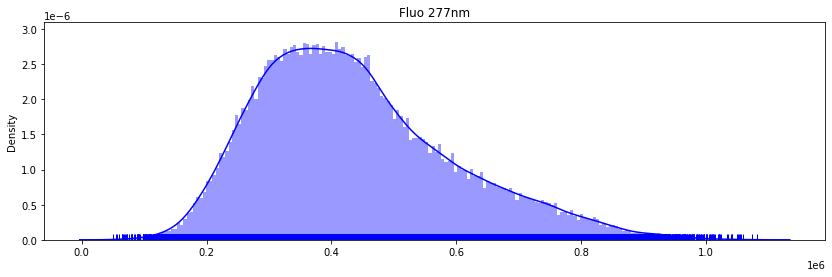

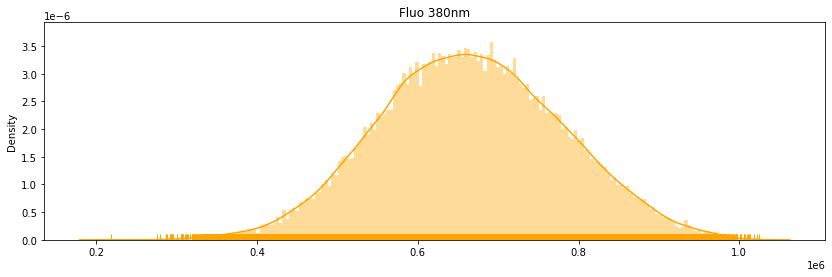

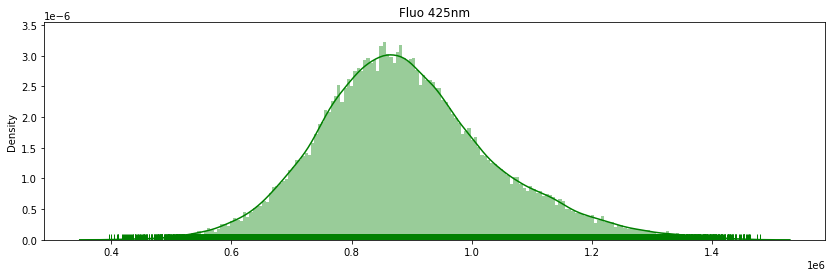

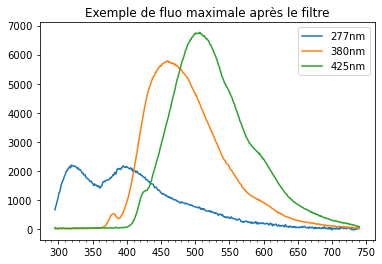

In [16]:
plt.figure(0, figsize=(14, 4))
plt.title("Fluo 277nm")
sns.distplot(fluos[0][top_mask].sum(axis=1), color='blue', bins=200, rug = True, hist_kws={'alpha': 0.4}, );


plt.figure(1, figsize=(14, 4))
plt.title("Fluo 380nm")
sns.distplot(fluos[1][top_mask].sum(axis=1), color='orange', bins=200, rug = True, hist_kws={'alpha': 0.4});


plt.figure(2, figsize=(14, 4))
plt.title("Fluo 425nm")
sns.distplot(fluos[2][top_mask].sum(axis=1), color='green', bins=200, rug = True, hist_kws={'alpha': 0.4});


current_max_row = fluos[2].loc[top_mask].idxmax()[0]
print("Plus gros spectre: " + current_max_row)

plt.figure(5)
plt.plot(fluos_axis, fluos[0].loc[current_max_row], label = "277nm")
plt.plot(fluos_axis, fluos[1].loc[current_max_row], label = "380nm")
plt.plot(fluos_axis, fluos[2].loc[current_max_row], label = "425nm")

ax = plt.gca()
ax.legend()
ax.xaxis.set_major_locator(ticker.MultipleLocator(50))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(10))

plt.title("Exemple de fluo maximale après le filtre");

# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     display(Y_data.loc[fluos[2].loc[top_mask].idxmax()])

Voici les distributions des intégrales après le nettoyage des valeurs trop grandes et le spectre le plus gros correspondant à la série nettoyée. C'est encore très gros, mais au moins ils rentrent dans la distribution et on aura p-e assez d'exemples pour les classer.

Pour ce qui est des spectres de LSPR, la grande intégration est fortement reliée à un défaut VR ou CT, donc on garde ces échantillons, même s'ils sont loin de la distribution.

<br><br><br>
<u>Nettoyage des spectres trop faibles</u>

In [20]:

low_mask_277 = fluos[0].sum(axis=1)>150000
low_mask_380 = fluos[1].sum(axis=1)>220000
low_mask_425 = fluos[2].sum(axis=1)>300000
low_mask = low_mask_277 & low_mask_380 & low_mask_425
global_mask = low_mask & top_mask

print("low_mask_277 enleve " + str(fluos[0].loc[~low_mask_277].shape[0] / fluos[0].shape[0] * 100) + "% des spectres.")
print("low_mask_380 enleve " + str(fluos[0].loc[~low_mask_380].shape[0] / fluos[0].shape[0] * 100) + "% des spectres.")
print("low_mask_425 enleve " + str(fluos[0].loc[~low_mask_425].shape[0] / fluos[0].shape[0] * 100) + "% des spectres.")
print("Combinaison des low_masks: " + str(fluos[0][~low_mask].shape[0] / fluos[2].shape[0] * 100) + "% des spectres.")


print("Combinaison low+high masks: " + str(fluos[0].loc[~global_mask].shape[0] / fluos[2].shape[0] * 100) + "% des spectres.")

low_mask_277 enleve 0.46782865775409754% des spectres.
low_mask_380 enleve 0.001624405061646172% des spectres.
low_mask_425 enleve 0.0% des spectres.
Combinaison des low_masks: 0.46782865775409754% des spectres.
Combinaison low+high masks: 9.254235636198242% des spectres.


/home/vincent/miniconda3/envs/ml/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/vincent/miniconda3/envs/ml/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/vincent/miniconda3/envs/ml/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/h

Plus petit spectre: spectraceriii_01-171737


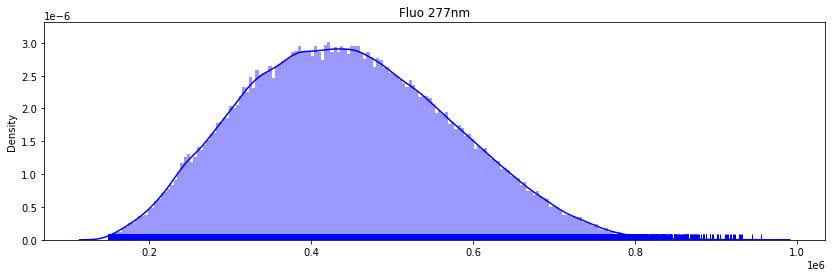

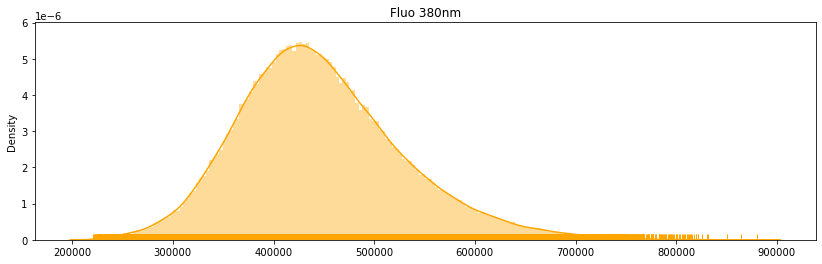

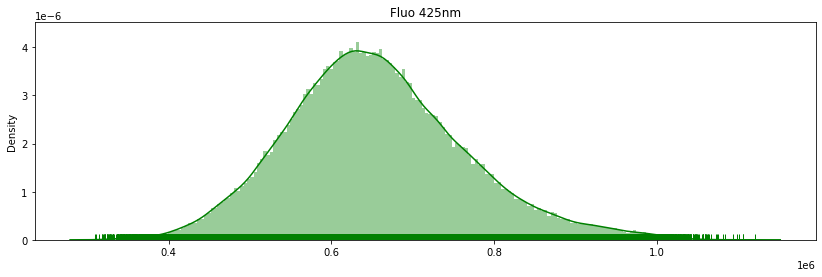

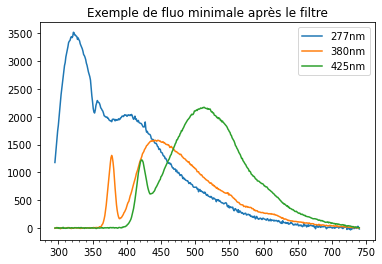

In [46]:
plt.figure(0, figsize=(14, 4))
plt.title("Fluo 277nm")
sns.distplot(fluos[0][global_mask].sum(axis=1), color='blue', bins=200, rug = True, hist_kws={'alpha': 0.4}, );


plt.figure(1, figsize=(14, 4))
plt.title("Fluo 380nm")
sns.distplot(fluos[1][global_mask].sum(axis=1), color='orange', bins=200, rug = True, hist_kws={'alpha': 0.4});


plt.figure(2, figsize=(14, 4))
plt.title("Fluo 425nm")
sns.distplot(fluos[2][global_mask].sum(axis=1), color='green', bins=200, rug = True, hist_kws={'alpha': 0.4});

current_min_row = fluos[2].loc[global_mask].sum(axis=1).idxmin()
print("Plus petit spectre: " + current_min_row)


plt.figure(5)
plt.plot(fluos_axis, fluos[0].loc[current_min_row], label = "277nm")
plt.plot(fluos_axis, fluos[1].loc[current_min_row], label = "380nm")
plt.plot(fluos_axis, fluos[2].loc[current_min_row], label = "425nm")

ax = plt.gca()
ax.legend()
ax.xaxis.set_major_locator(ticker.MultipleLocator(50))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(10))

plt.title("Exemple de fluo minimale après le filtre");

# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     display(Y_data.loc[fluos[2].loc[top_mask].idxmax()])

Clean!!!! On peut revenir ici pour modifier si on a des problèmes. En bonus, je remarque que ceux que le lambda max a mal été calculé ne sont pu là.

/home/vincent/miniconda3/envs/ml/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/vincent/miniconda3/envs/ml/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/vincent/miniconda3/envs/ml/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misi

<Figure size 432x288 with 0 Axes>

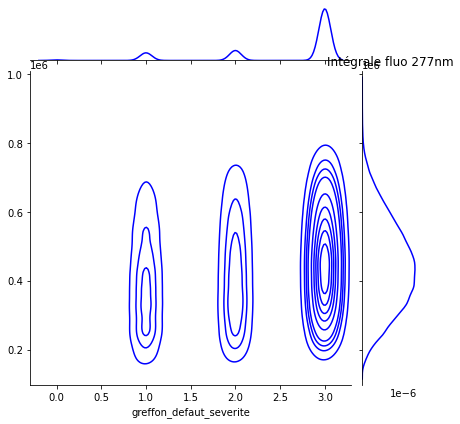

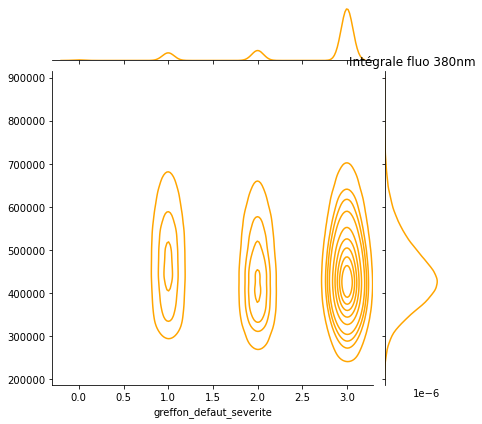

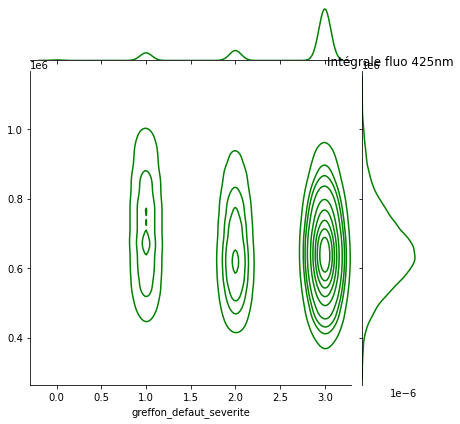

In [47]:
plt.figure(0)
sns.jointplot(Y.loc[global_mask], fluos[0].loc[global_mask].sum(axis=1), kind='kde', color = "blue");
plt.title("Intégrale fluo 277nm");

plt.figure(1)
sns.jointplot(Y.loc[global_mask], fluos[1].loc[global_mask].sum(axis=1), kind='kde', color = "orange");
plt.title("Intégrale fluo 380nm");

plt.figure(2)
sns.jointplot(Y.loc[global_mask], fluos[2].loc[global_mask].sum(axis=1), kind='kde', color = "green");
plt.title("Intégrale fluo 425nm");

Grosse corélation entre VR et intensité de la LSPR!!!

<u>Traitement des données structurées.</u> <br>


Rajoutons les intégrales de spectre comme valeur.

In [23]:

somme_277nm = fluos[0].sum(axis=1)
somme_380nm = fluos[1].sum(axis=1)
somme_425nm = fluos[2].sum(axis=1)
others["somme_277nm"] = somme_277nm
others["somme_380nm"] = somme_380nm
others["somme_425nm"] = somme_425nm

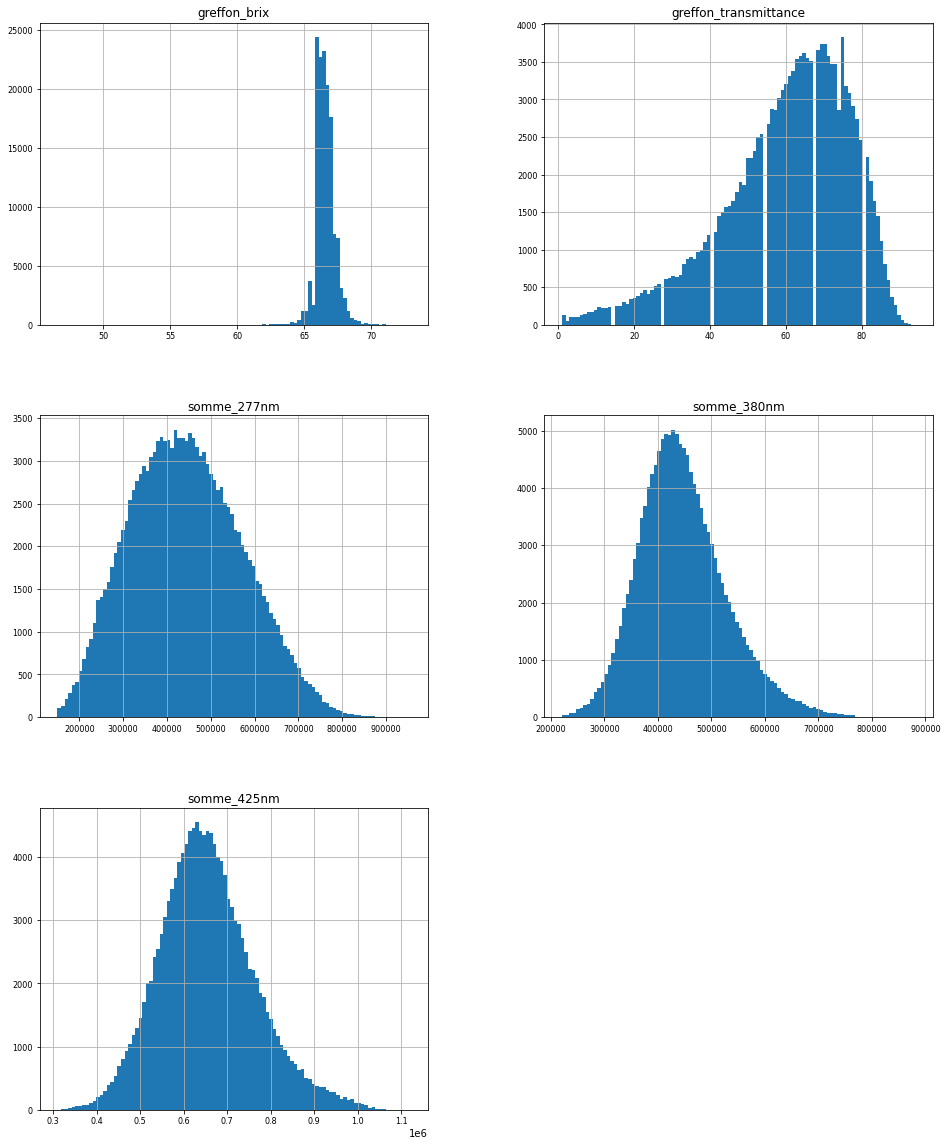

In [49]:
others[global_mask].hist(figsize=(16, 20), bins=100, xlabelsize=8, ylabelsize=8);



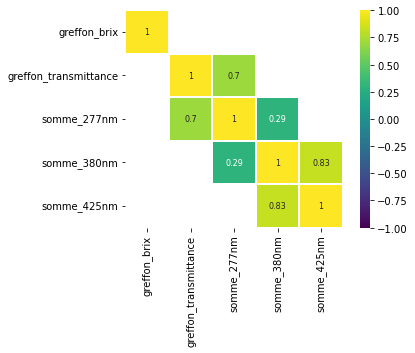

In [53]:
corr = others[global_mask].corr()
sns.heatmap(corr[(corr >= 0.2) | (corr <= -0.2)], cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

Deux corrélations à extraire ici:
1. Forte corrélation entre intégrale à 380nm et 425nm, signe que les deux ont un gros overlap.
2. Corrélation de -0.54 entre transmittance et lambda_max. Et même, -0.64 entre intégrale LSPR et tranmittance. Plus l'échantillon est opaque, plus le shift est grand.


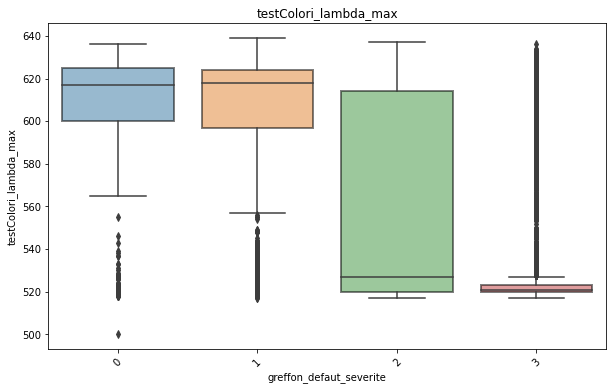

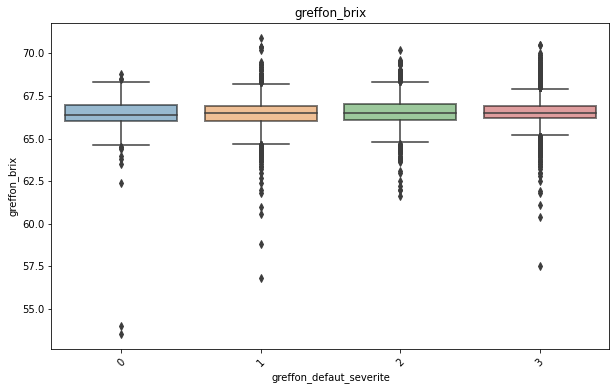

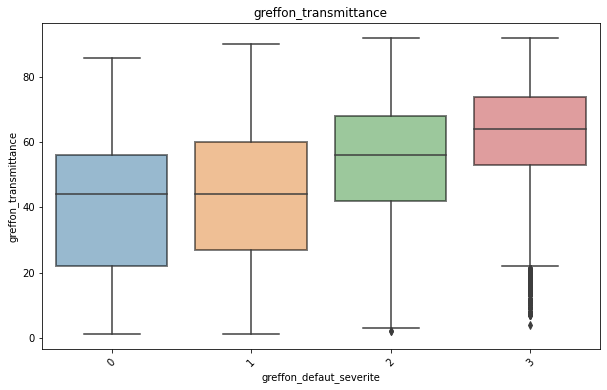

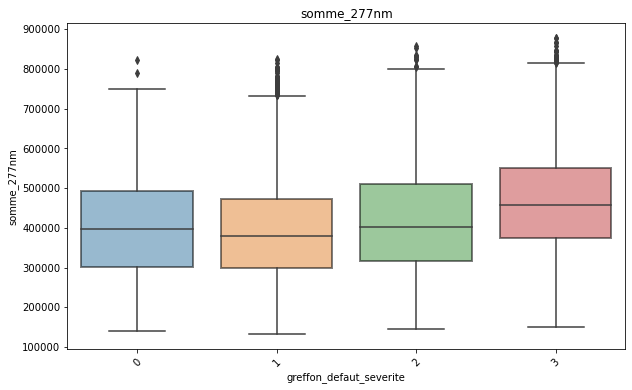

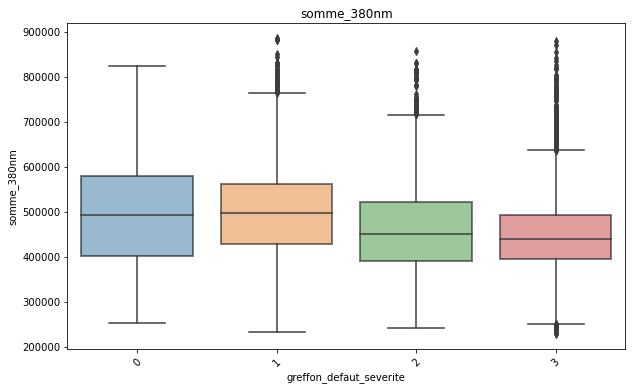

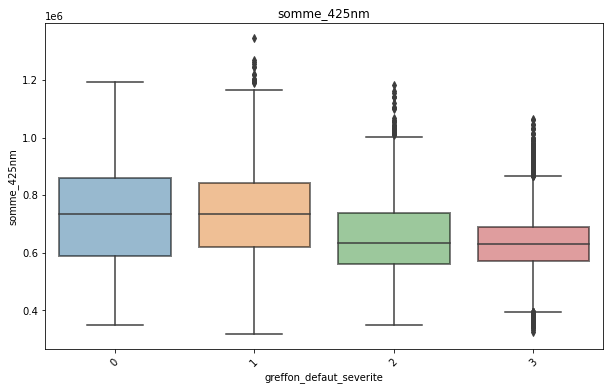

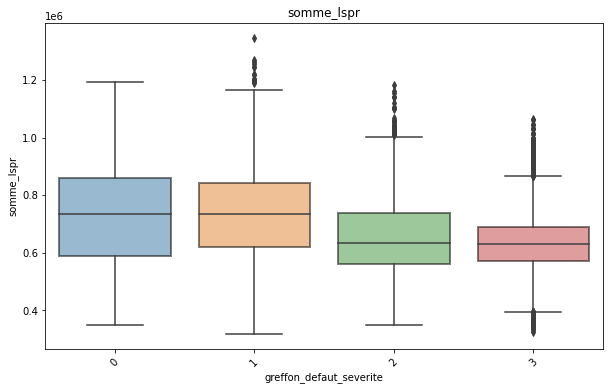

In [19]:
n = 0
for (name, data) in others[global_mask].iteritems():
    plt.figure( n, figsize = (10, 6))
    n+=1
    plt.title(name)
    ax = sns.boxplot(x=Y, y=data)
    plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
    plt.xticks(rotation=45)



En regardant les bar charts en-haut, on peut croire que mixer les crochets avec les OK n'est pas optimal, de par les OK étant très tight, mais pas les CROCHETS, donc on risque plus de mélanger.

In [21]:
result = pd.concat([fluos[0][global_mask].add_prefix("277_"),fluos[0][global_mask].add_prefix("380_"),fluos[0][global_mask].add_prefix("425_"), others[global_mask]], axis=1)
result.to_pickle("clean_results.pkl")


In [22]:
result = pd.read_pickle('/home/vincent/work/maple/aCeriNN/clean_results.pkl')
result

In [29]:
fluos[0]

,295,296,297,298,299,300,301,302,303,304,...,731,732,733,734,735,736,737,738,739,740
sequence,,,,,,,,,,,,,,,,,,,,,
spectraceriii_01-100000,1955.18,2154.89,2386.38,2616.97,2837.68,3044.95,3282.51,3488.95,3646.79,3814.64,...,4.38,17.93,5.23,16.62,19.68,8.45,23.25,-1.04,-6.94,-13.89
spectraceriii_01-100001,1854.39,2065.13,2241.67,2458.86,2681.57,2876.96,3125.38,3309.67,3514.32,3638.73,...,5.08,-9.36,-7.47,10.91,13.66,-5.31,-0.27,6.67,2.97,19.26
spectraceriii_01-100002,1528.18,1702.60,1844.14,2019.57,2194.93,2384.28,2554.86,2701.84,2821.85,2953.32,...,4.38,1.86,26.87,7.51,-13.20,3.93,15.35,14.20,2.56,11.84
spectraceriii_01-100003,1790.54,1997.12,2203.12,2420.92,2606.20,2825.81,3040.86,3219.49,3422.60,3603.16,...,8.80,2.43,7.79,10.27,9.45,6.98,-10.77,-2.20,5.97,-6.50
spectraceriii_01-100004,1490.55,1647.05,1819.96,1988.55,2171.13,2324.95,2482.18,2662.50,2808.10,2935.08,...,-7.99,6.25,26.53,-7.86,17.75,2.07,0.70,11.61,-20.69,4.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
spectraceriii_01-99995,779.44,862.59,976.82,1051.67,1135.74,1226.33,1302.00,1401.66,1509.06,1579.71,...,15.44,-16.16,12.49,3.96,8.07,7.23,5.34,17.46,13.30,0.90
spectraceriii_01-99996,1152.14,1281.77,1395.15,1547.75,1677.48,1812.40,1952.98,2055.79,2194.93,2336.20,...,13.19,-3.42,-1.91,18.54,3.68,-0.93,16.00,7.32,-5.43,11.21
spectraceriii_01-99997,886.10,1012.98,1090.28,1199.07,1318.13,1431.96,1491.81,1606.04,1721.91,1804.80,...,13.73,5.56,-2.83,-6.19,4.66,1.31,5.91,13.72,-0.46,0.89


In [30]:
fluos[1]

,295,296,297,298,299,300,301,302,303,304,...,731,732,733,734,735,736,737,738,739,740
sequence,,,,,,,,,,,,,,,,,,,,,
spectraceriii_01-100000,-2.64,-0.80,4.90,-2.16,4.50,1.75,-2.57,0.59,1.43,-2.36,...,11.24,7.89,10.70,7.78,2.40,6.86,3.30,4.16,6.66,0.08
spectraceriii_01-100001,0.75,-2.17,5.70,3.39,6.77,6.50,-2.11,-3.84,4.10,0.17,...,17.99,7.12,16.33,8.74,9.15,2.36,7.26,6.21,8.00,1.66
spectraceriii_01-100002,1.89,6.36,0.06,4.94,0.22,0.13,7.04,2.24,-2.49,3.13,...,9.36,3.70,11.17,3.65,11.17,12.12,12.43,-1.80,8.72,0.08
spectraceriii_01-100003,3.37,1.61,5.94,5.92,-1.06,-3.52,0.35,-2.21,10.07,5.51,...,8.30,7.51,6.81,11.40,7.23,19.54,10.99,11.78,6.87,10.09
spectraceriii_01-100004,5.06,6.42,1.27,-0.30,2.94,-4.11,2.56,7.63,4.64,-2.06,...,16.91,9.68,11.45,5.49,2.08,5.91,-4.50,5.93,4.58,5.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
spectraceriii_01-99995,5.12,3.24,4.51,5.21,3.43,6.30,9.50,5.81,5.36,-0.47,...,19.74,16.57,14.62,16.75,14.67,16.63,18.09,12.39,13.08,9.64
spectraceriii_01-99996,6.32,0.70,7.60,-0.21,2.46,4.28,0.19,-5.90,-1.19,-0.86,...,20.18,15.20,7.73,15.39,11.27,11.55,6.93,10.38,9.04,5.85
spectraceriii_01-99997,6.76,8.08,6.32,8.22,2.67,-3.72,1.00,-1.53,5.75,1.60,...,23.12,16.85,16.42,22.86,11.37,7.40,9.93,3.45,8.10,7.63


In [31]:
fluos[2]

,295,296,297,298,299,300,301,302,303,304,...,731,732,733,734,735,736,737,738,739,740
sequence,,,,,,,,,,,,,,,,,,,,,
spectraceriii_01-100000,1.40,2.52,6.42,-1.33,1.30,5.76,-0.20,0.37,-0.46,-1.46,...,28.72,35.76,35.48,19.66,23.65,18.44,19.02,17.11,18.81,22.05
spectraceriii_01-100001,3.51,4.41,4.51,6.39,3.96,0.68,6.13,5.02,4.59,-3.50,...,43.75,45.40,28.27,30.57,31.94,27.78,24.68,16.18,21.13,14.73
spectraceriii_01-100002,7.11,5.39,3.06,7.85,2.48,2.47,-0.25,-2.88,0.47,-3.89,...,33.66,24.26,22.13,21.64,18.14,20.87,16.12,13.25,13.74,16.45
spectraceriii_01-100003,3.09,4.31,7.87,4.57,8.13,1.49,-3.46,0.03,4.30,3.75,...,31.19,25.40,32.08,29.49,20.56,21.77,12.49,17.91,13.07,11.40
spectraceriii_01-100004,8.97,0.54,-0.65,6.81,1.31,-1.97,0.57,5.36,3.44,1.16,...,29.41,27.03,27.72,20.92,27.28,15.51,10.00,9.35,12.55,19.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
spectraceriii_01-99995,8.21,4.73,7.34,5.47,1.46,0.64,8.01,0.89,0.75,6.17,...,57.65,56.39,47.47,48.33,34.27,35.75,33.55,31.17,28.75,24.20
spectraceriii_01-99996,4.34,3.76,1.15,2.38,0.59,7.44,7.58,3.10,7.53,-4.34,...,47.52,43.27,40.40,35.99,38.32,31.60,21.62,22.17,29.79,26.16
spectraceriii_01-99997,6.67,2.65,3.89,0.25,4.80,12.03,4.01,3.58,10.65,7.13,...,56.86,45.83,34.48,38.12,32.69,29.09,28.95,26.81,20.12,22.34


In [40]:
pd.concat((fluos[0].add_prefix("277_"),fluos[1].add_prefix("380_")))

,277_295,277_296,277_297,277_298,277_299,277_300,277_301,277_302,277_303,277_304,...,380_731,380_732,380_733,380_734,380_735,380_736,380_737,380_738,380_739,380_740
sequence,,,,,,,,,,,,,,,,,,,,,
spectraceriii_01-100000,1955.18,2154.89,2386.38,2616.97,2837.68,3044.95,3282.51,3488.95,3646.79,3814.64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
spectraceriii_01-100001,1854.39,2065.13,2241.67,2458.86,2681.57,2876.96,3125.38,3309.67,3514.32,3638.73,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
spectraceriii_01-100002,1528.18,1702.60,1844.14,2019.57,2194.93,2384.28,2554.86,2701.84,2821.85,2953.32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
spectraceriii_01-100003,1790.54,1997.12,2203.12,2420.92,2606.20,2825.81,3040.86,3219.49,3422.60,3603.16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
spectraceriii_01-100004,1490.55,1647.05,1819.96,1988.55,2171.13,2324.95,2482.18,2662.50,2808.10,2935.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
spectraceriii_01-99995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19.74,16.57,14.62,16.75,14.67,16.63,18.09,12.39,13.08,9.64
spectraceriii_01-99996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.18,15.20,7.73,15.39,11.27,11.55,6.93,10.38,9.04,5.85
spectraceriii_01-99997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23.12,16.85,16.42,22.86,11.37,7.40,9.93,3.45,8.10,7.63
